<img src="https://github.com/mtreinish/qiskit-workshop/blob/master/qiskit-heading.png?raw=1" alt="Drawing" style="width: 300px;"/>


# Get Started with Quantum Computing and Qiskit

This workshop is hosted at: https://github.com/mtreinish/qiskit-workshop

To get started we'll need to install Qiskit. If you have Python >= 3.5 and Jupyter installed you can run this locally. Or alternatively you can run this in Google Colab (if you have a Google account):
https://colab.research.google.com/github/mtreinish/qiskit-workshop/blob/master/Workshop.ipynb

Once you have the workshop running if you have not installed Qiskit before (or you are running in colab) you can uncomment and run the following cell to install it:

In [1]:
!pip install qiskit

!pip install pylatexenc

Once we have Qiskit is installed we want to test that it's working properly.

In [62]:
import qiskit
from qiskit import IBMQ
from qiskit.tools.jupyter import *
import collections
import pylatexenc

qiskit.__version__


# supply openai api key via file 
qiskit_key = open('qiskit_key').read()

## Signup for the Quantum Experience

While for the most part we'll use local simulation for this workshop, if you want to run anything on a real quantum device you'll need an account on the Quantum Experience. We'll do this before moving on:

1. Visit: https://quantumexperience.ng.bluemix.net/qx/ and signup for an account. You can use a SSO from an IBMid, LinkedIn, Github, Google, or Twitter in addition to creating a new account.

![Login Box](https://github.com/mtreinish/qiskit-workshop/blob/master/QX_login.png?raw=1)



2. After you're logged into your new account visit: https://quantumexperience.ng.bluemix.net/qx/account/advanced where you'll need to generate an **API Token**. Once you've generated a token you'll want to copy it so we can use Qiskit to store it locally so it can be used for accessing the quantum devices.


In [5]:
# Enable your account on Qiskit, replace 'My_API_Token' with your newly generated token
IBMQ.ibmq.save_account(qiskit_key)
IBMQ.ibmq.load_account()
# After loading credentials we query the backends
# qiskit.backends()

configrc.store_credentials:WARNING:2022-03-23 19:36:43,589: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2022-03-23 19:36:44,311: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [7]:
# Show Quantum Device Overiew
%qiskit_backend_overview

In [8]:
# Show individual backend details

provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()



[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

## Running on a Quantum Device
In any of the examples below you can simply replace the use of the `backend_sim` variable with `backend` in any calls to `qiskit.execute()` below and it'll run the circuit on a real quantum device instead of in the local simulator. However be aware that because the real devices are shared time you'll likely have to wait some time in the queue before your job executes.

# The Qubit

In [9]:
# Use BasicAer's qasm_simulator
backend_sim = qiskit.BasicAer.get_backend('qasm_simulator')

In [10]:
# Define the Quantum and Classical Registers
q = qiskit.QuantumRegister(1)
c = qiskit.ClassicalRegister(1)

# Build the circuit
single_q_measurement = qiskit.QuantumCircuit(q, c)
single_q_measurement.measure(q, c);

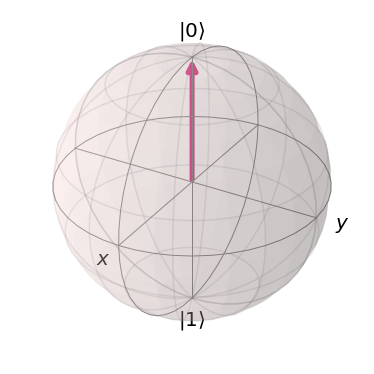

In [11]:
qiskit.tools.visualization.plot_bloch_vector([0, 0, 1])

In [12]:
# Execute the circuit
job = qiskit.execute(single_q_measurement, backend_sim)
result = job.result()
# Print the result
counts = result.get_counts(single_q_measurement)
print(counts)

{'0': 1024}


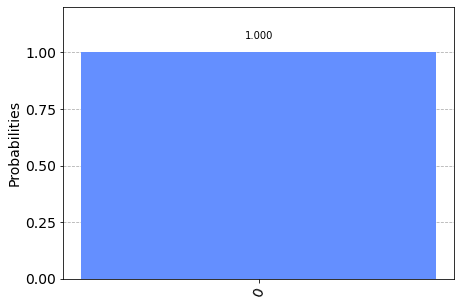

In [13]:
qiskit.tools.visualization.plot_histogram(counts)

# The Quantum Not Gate

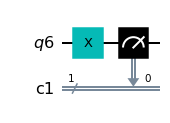

In [14]:
# Create a Quantum Register with 1 qubit (wire).
qr = qiskit.QuantumRegister(1)

# Create a Classical Register with 1 bit (double wire).
cr = qiskit.ClassicalRegister(1)

# Create a Quantum Circuit from the quantum and classical registers
circ = qiskit.QuantumCircuit(qr, cr)

# Place an X gate on the qubit wire. The registers are zero-indexed.
circ.x(qr[0])

# Measure the qubit into the classical register
circ.measure(qr, cr)

# Draw the circuit
circ.draw(output='mpl')

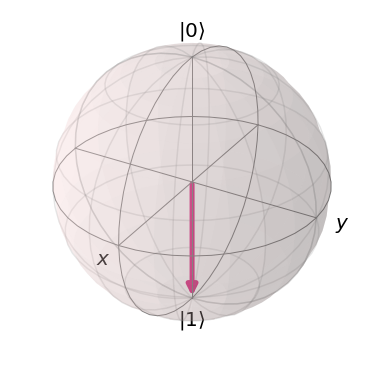

In [15]:
qiskit.tools.visualization.plot_bloch_vector([0, 0, -1])

In [16]:
# Execute the circuit on the qasm simulator, running it 100 times.
job_sim = qiskit.execute(circ, backend_sim, shots=100)

# Grab the results from the job.
result_sim = job_sim.result()

# Print the counts, which are contained in a Python dictionary
counts = result_sim.get_counts(circ)
print(counts)

{'1': 100}


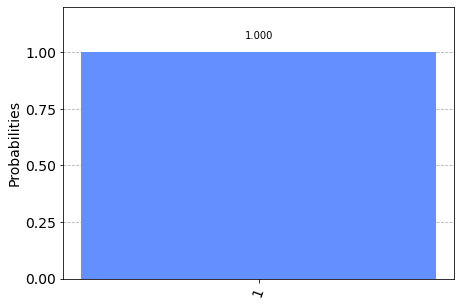

In [17]:
# Plot the results on a bar chart
qiskit.tools.visualization.plot_histogram(counts)

# Superposition

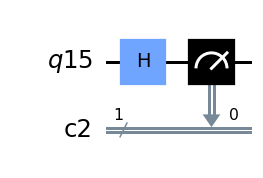

In [18]:
# Create a Quantum Register with 1 qubit (wire).
qr = qiskit.QuantumRegister(1)

# Create a Classical Register with 1 bit (double wire).
cr = qiskit.ClassicalRegister(1)

# Create a Quantum Circuit from the quantum and classical registers
circ = qiskit.QuantumCircuit(qr, cr)

# Place an Hadamard gate on the qubit wire
circ.h(qr[0])

# Measure the qubit into the classical register
circ.measure(qr, cr)

# Draw the circuit
circ.draw(output='mpl', scale=1.5)

In [19]:
# Execute the circuit on the qasm simulator, running it 100 times.
job_sim = qiskit.execute(circ, backend_sim, shots=100)

# Grab the results from the job.
result_sim = job_sim.result()

# Print the counts, which are contained in a Python dictionary
counts = result_sim.get_counts(circ)
print(counts)

{'1': 54, '0': 46}


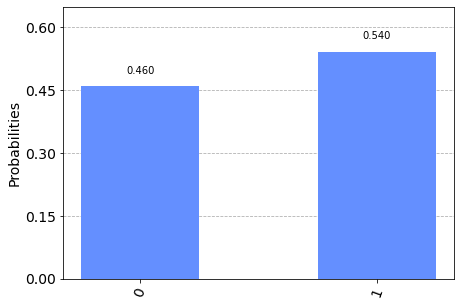

In [20]:
# Plot the results on a bar chart
qiskit.tools.visualization.plot_histogram(counts)

This demonstrates the first principle fundamental princple of quantum mechanics that provide a good starting point for understanding quantum computation. The priciple of superposition, that a physical system in a definite state can still behave randomly.

## Applying Hadarmards Twice

Now that we've applied a Hadamard gate and put a qubit in superposition, what happens if you apply a hadamard to a qubit already in a the $|0+1\rangle$ state.

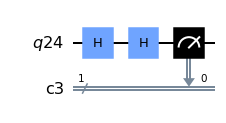

In [21]:
# Build a circuit with 1 qubit and 1 classical bit
qr = qiskit.QuantumRegister(1)
cr = qiskit.ClassicalRegister(1)
qc = qiskit.QuantumCircuit(qr, cr)
# Apply 2 Hadamard gates on the circuit and then measure
qc.h(qr[0])
qc.h(qr[0])
qc.measure(qr, cr)
# Draw the circuit
qc.draw(output='mpl')

In [22]:
# Run the circuit and print the output counts
result = qiskit.execute(qc, backend_sim, shots=100).result()
counts = result.get_counts()
print(counts)

{'0': 100}


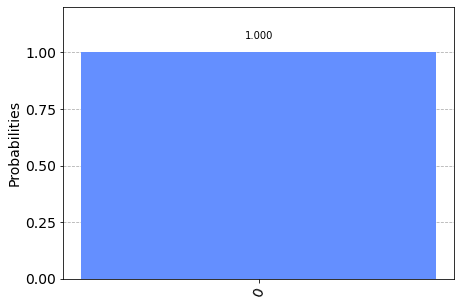

In [23]:
# Print the histogram
qiskit.tools.visualization.plot_histogram(counts)

### Apply Hadamard twice from |$1\rangle$ basis state

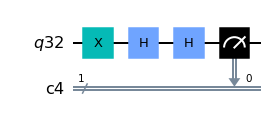

In [24]:
# Build a circuit with 1 qubit and 1 classical bit
qr = qiskit.QuantumRegister(1)
cr = qiskit.ClassicalRegister(1)
qc = qiskit.QuantumCircuit(qr, cr)
# Apply 2 Hadamard gates on the circuit and then measure
qc.x(qr[0])
qc.h(qr[0])
qc.h(qr[0])
qc.measure(qr, cr)
# Draw the circuit
qc.draw(output='mpl')

In [25]:
# Run the circuit and print the output counts
result = qiskit.execute(qc, backend_sim, shots=100).result()
counts = result.get_counts()
print(counts)

{'1': 100}


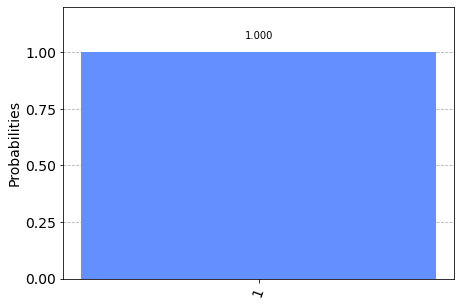

In [26]:
# Print the histogram
qiskit.tools.visualization.plot_histogram(counts)

# Other Quantum Gates

The list of standard available logic gates are documented here:

https://github.com/Qiskit/qiskit-tutorials/blob/master/qiskit/terra/summary_of_quantum_operations.ipynb

However, that guide typically only explains the operation performed by using it's unitary matrix. If you want to visualize the output state from using a quantum gate on the bloch sphere you can use the statevector simulator to do this:

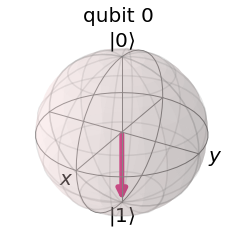

In [27]:
# Get the statevector simulator to inspect the quantum state
backend_sv_sim = qiskit.BasicAer.get_backend('statevector_simulator')
qr = qiskit.QuantumRegister(1)
cr = qiskit.ClassicalRegister(1)
circ = qiskit.QuantumCircuit(qr, cr)
circ.y(qr)
result = qiskit.execute(circ, backend_sv_sim).result()
qiskit.tools.visualization.plot_bloch_multivector(result.get_statevector())

The above shows the end state after applying the Pauli Y gate (which like the Pauli X/Quantum Not gate) can be thought of a 180 degree rotation around the Y axis. So when starting from the |$0\rangle$ basis state the result is the |$1\rangle$ basis state.

However, many gates rotate the phase. To visualize any change in phase you'll want to put the qubit in superposition with a hadamard gate first. For example:

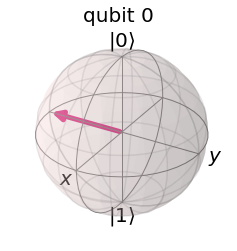

In [28]:
qr = qiskit.QuantumRegister(1)
cr = qiskit.ClassicalRegister(1)
circ = qiskit.QuantumCircuit(qr, cr)
circ.h(qr)
circ.sdg(qr)
result = qiskit.execute(circ, backend_sv_sim).result()

qiskit.tools.visualization.plot_bloch_multivector(result.get_statevector())

This example shows the output of the $S^{\dagger}$ (or, conjugate of $\sqrt{Z}$ phase) gate on the bloch sphere for a qubit in superposition from a Hadamard gate. Since it is a phase gate it has no noticeable effect on a qubit in the |$0\rangle$ basis state:

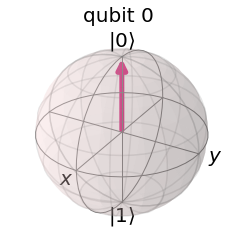

In [29]:
qr = qiskit.QuantumRegister(1)
cr = qiskit.ClassicalRegister(1)
circ = qiskit.QuantumCircuit(qr, cr)
circ.sdg(qr)
result = qiskit.execute(circ, backend_sv_sim).result()

qiskit.tools.visualization.plot_bloch_multivector(result.get_statevector())

# Multi Qubit Circuits and Gates

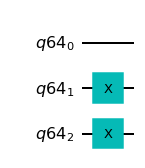

In [30]:
# Create a Quantum Register with 3 qubits
qr = qiskit.QuantumRegister(3)

# Create a Quantum Circuit from the quantum register. Because we're going to use
# the statevector_simulator, we won't measure the circuit or need classical registers.
circ = qiskit.QuantumCircuit(qr)

# Place an X gate on the 2nd and 3rd wires. The topmost wire is index 0.
circ.x(qr[1])
circ.x(qr[2])

# Draw the circuit
circ.draw(output='mpl')

In [31]:
# Execute the circuit on the state vector simulator
job_sim = qiskit.execute(circ, backend_sv_sim)

# Grab the results from the job.
result_sim = job_sim.result()

# Obtain the state vector for the quantum circuit
quantum_state = result_sim.get_statevector(circ, decimals=3)

# Output the quantum state vector
print(quantum_state)

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]


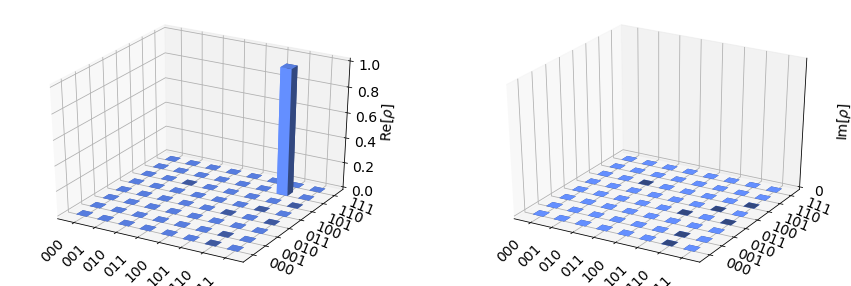

In [32]:
qiskit.tools.visualization.plot_state_city(quantum_state)

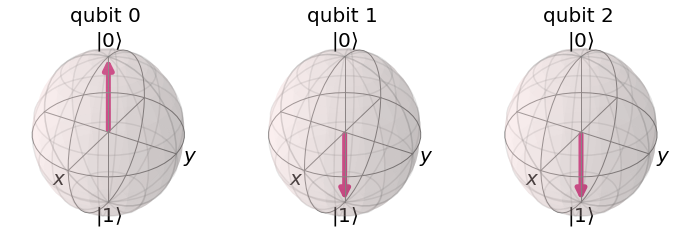

In [33]:
qiskit.tools.visualization.plot_bloch_multivector(quantum_state)

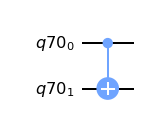

In [34]:
# Create a Quantum Register with 3 qubits
qr = qiskit.QuantumRegister(2)
cr = qiskit.ClassicalRegister(2)
circ = qiskit.QuantumCircuit(qr)
# Apply a CNOT gate with qr[0] as the control and qr[1] as the target
circ.cx(qr[0], qr[1])

meas = qiskit.QuantumCircuit(qr, cr)
meas.measure(qr, cr)

# Draw the circuit
circ.draw(output='mpl')

In [35]:
# Execute the circuit on the state vector simulator
job_sim = qiskit.execute(circ, backend_sv_sim)

# Grab the results from the job.
result_sim = job_sim.result()

# Obtain the state vector for the quantum circuit
quantum_state = result_sim.get_statevector(circ, decimals=3)

# Output the quantum state vector
print(quantum_state)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


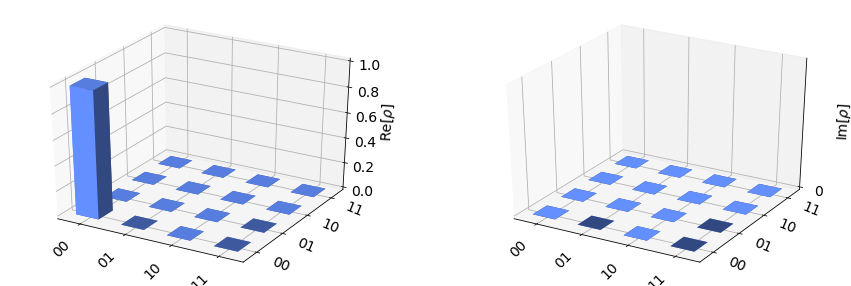

In [36]:
qiskit.tools.visualization.plot_state_city(quantum_state)

In [37]:
# Execute the circuit on the state vector simulator
job_sim = qiskit.execute(circ + meas, backend_sim)

# Grab the results from the job.
result = job_sim.result()

counts = result.get_counts()
# Output the quantum state vector
print(counts)

{'00': 1024}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  


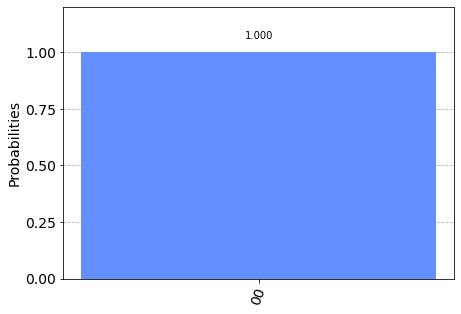

In [38]:
qiskit.tools.visualization.plot_histogram(counts)

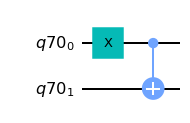

In [39]:
circ = qiskit.QuantumCircuit(qr)
# Apply an X gate on qr[0] before the CNOT
circ.x(qr[0])

# Apply a CNOT gate with qr[0] as the control and qr[1] as the target
circ.cx(qr[0], qr[1])

# Draw the circuit
circ.draw(output='mpl')

In [40]:
# Execute the circuit on the state vector simulator
job_sim = qiskit.execute(circ, backend_sv_sim)

# Grab the results from the job.
result_sim = job_sim.result()

# Obtain the state vector for the quantum circuit
quantum_state = result_sim.get_statevector(circ, decimals=3)

# Output the quantum state vector
print(quantum_state)

[0.+0.j 0.+0.j 0.+0.j 1.+0.j]


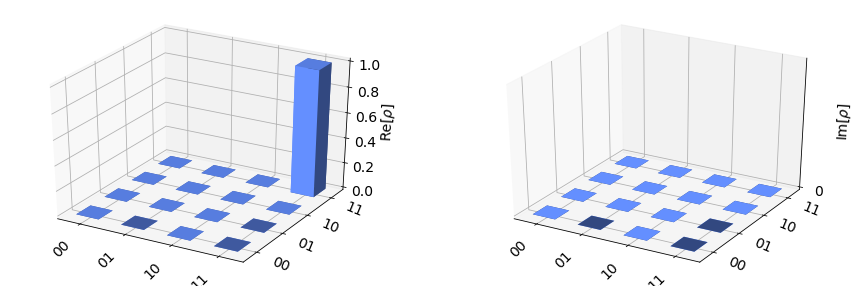

In [41]:
qiskit.tools.visualization.plot_state_city(quantum_state)

In [42]:
# Execute the circuit on the state vector simulator
job_sim = qiskit.execute(circ + meas, backend_sim)

# Grab the results from the job.
result = job_sim.result()

counts = result.get_counts()
# Output the quantum state vector
print(counts)

{'11': 1024}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  


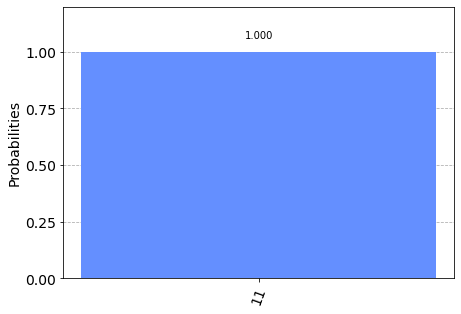

In [43]:
qiskit.tools.visualization.plot_histogram(counts)

These are all still classical operations and states, just with multiple qubits. Lets look at what happens when we start using CNOT outside of a basis state.

# Entanglement

In [44]:
# Creating registers
q2 = qiskit.QuantumRegister(2)
c1 = qiskit.ClassicalRegister(1)
c2 = qiskit.ClassicalRegister(2)

# quantum circuit to make an entangled bell state 
bell = qiskit.QuantumCircuit(q2)
bell.h(q2[0])
bell.cx(q2[0], q2[1])

# quantum circuit to measure q0 in the standard basis
measureIZ = qiskit.QuantumCircuit(q2, c1)
measureIZ.measure(q2[0], c1[0])
bellIZ = bell + measureIZ

# quantum circuit to measure q0 in the superposition basis 
measureIX = qiskit.QuantumCircuit(q2, c1)
measureIX.h(q2[0])
measureIX.measure(q2[0], c1[0])
bellIX = bell + measureIX

# quantum circuit to measure q1 in the standard basis
measureZI = qiskit.QuantumCircuit(q2, c1)
measureZI.measure(q2[1], c1[0])
bellZI = bell + measureZI

# quantum circuit to measure q1 in the superposition basis 
measureXI = qiskit.QuantumCircuit(q2, c1)
measureXI.h(q2[1])
measureXI.measure(q2[1], c1[0])
bellXI = bell + measureXI

# quantum circuit to measure q in the standard basis 
measureZZ = qiskit.QuantumCircuit(q2, c2)
measureZZ.measure(q2[0], c2[0])
measureZZ.measure(q2[1], c2[1])
bellZZ = bell + measureZZ

# quantum circuit to measure q in the superposition basis 
measureXX = qiskit.QuantumCircuit(q2, c2)
measureXX.h(q2[0])
measureXX.h(q2[1])
measureXX.measure(q2[0], c2[0])
measureXX.measure(q2[1], c2[1])
bellXX = bell + measureXX

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: The 

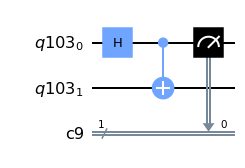

In [45]:
bellIZ.draw(output='mpl')

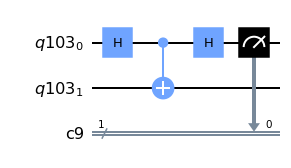

In [46]:
bellIX.draw(output='mpl')

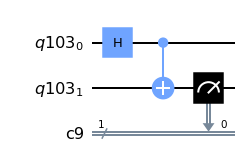

In [47]:
bellZI.draw(output='mpl')

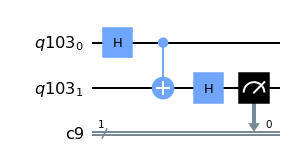

In [48]:
bellXI.draw(output='mpl')

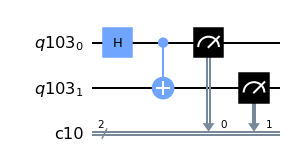

In [49]:
bellZZ.draw(output='mpl')

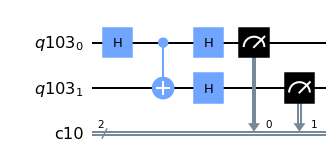

In [50]:
bellXX.draw(output='mpl')

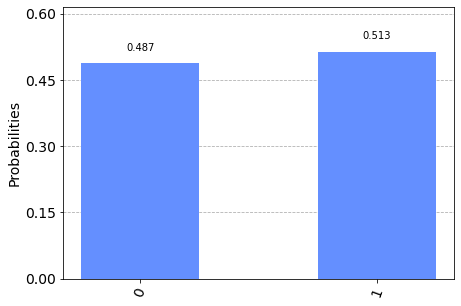

In [51]:
circuits = [bellIZ,bellIX,bellZI,bellXI,bellZZ,bellXX]
job = qiskit.execute(circuits, backend_sim)
result = job.result()

result_sv = qiskit.execute(bell, backend_sv_sim).result()

qiskit.tools.visualization.plot_histogram(result.get_counts(bellIZ))

In [52]:
result.get_counts(bellIZ)

{'0': 499, '1': 525}

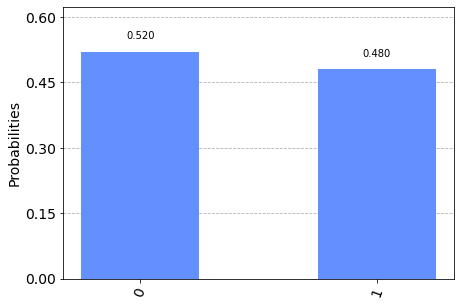

In [53]:
qiskit.tools.visualization.plot_histogram(result.get_counts(bellIX))

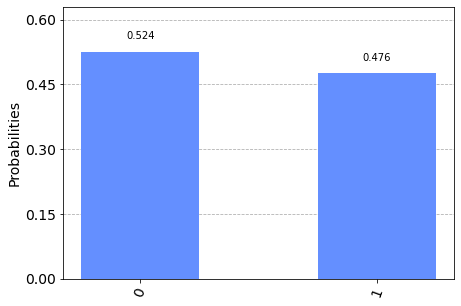

In [54]:
qiskit.tools.visualization.plot_histogram(result.get_counts(bellZI))

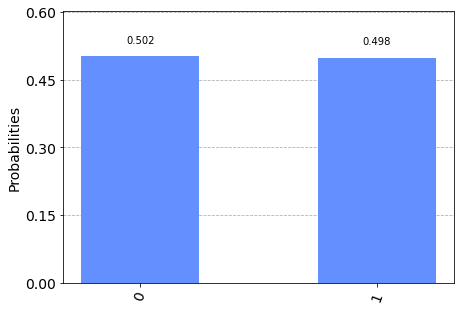

In [55]:
qiskit.tools.visualization.plot_histogram(result.get_counts(bellXI))

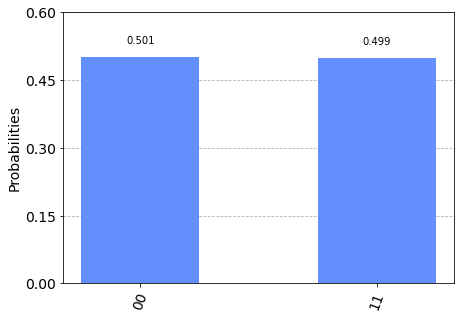

In [56]:
qiskit.tools.visualization.plot_histogram(result.get_counts(bellZZ))

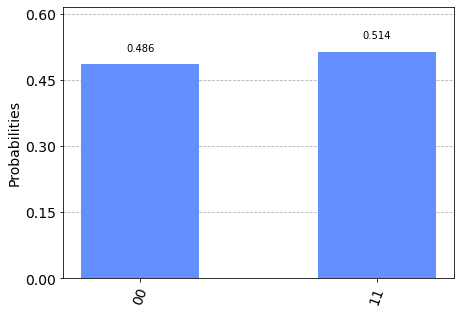

In [57]:
qiskit.tools.visualization.plot_histogram(result.get_counts(bellXX))

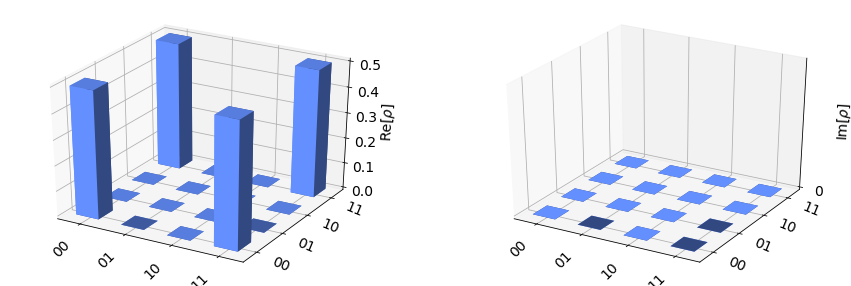

In [58]:
qiskit.tools.visualization.plot_state_city(result_sv.get_statevector())

## Mixed State vs Entanglement

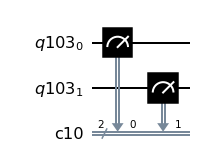

In [59]:
# quantum circuit to make a mixed state 
mixed1 = qiskit.QuantumCircuit(q2, c2)
mixed2 = qiskit.QuantumCircuit(q2, c2)
mixed2.x(q2)
mixed1.measure(q2[0], c2[0])
mixed1.measure(q2[1], c2[1])
mixed2.measure(q2[0], c2[0])
mixed2.measure(q2[1], c2[1])

mixed1.draw(output='mpl')

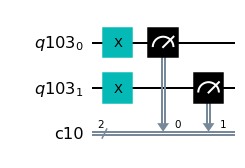

In [60]:
mixed2.draw(output='mpl')

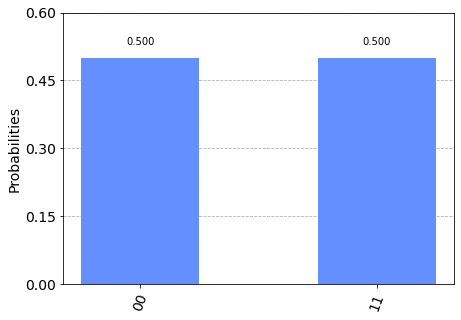

In [64]:
mixed_state = [mixed1,mixed2]
job = qiskit.execute(mixed_state, backend_sim)
result = job.result()

counts1 = result.get_counts(mixed_state[0])
counts2 = result.get_counts(mixed_state[1])

ground = collections.Counter(counts1)
excited = collections.Counter(counts2)
qiskit.tools.visualization.plot_histogram(ground + excited)

We do see the same kind of correlation indeed as we observed in the "bell_measureZZ" circuit. But we know this is not an entangled state! All we have done is leave the qubits in their ground state for some of the shots and flip both qubits for some of the shots. This is called a mixed state and it is a classical state. Now, would we observe a similar outcome if we measured this mixed state in the superposition basis?

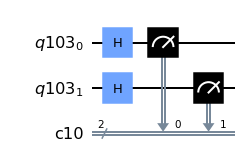

In [65]:
# quantum circuit to make a mixed state 
mixed3 = qiskit.QuantumCircuit(q2, c2)
mixed3.h(q2)
mixed3.measure(q2[0], c2[0])
mixed3.measure(q2[1], c2[1])
mixed4 = qiskit.QuantumCircuit(q2, c2)
mixed4.x(q2)
mixed4.h(q2)
mixed4.measure(q2[0], c2[0])
mixed4.measure(q2[1], c2[1])
mixed3.draw(output='mpl')

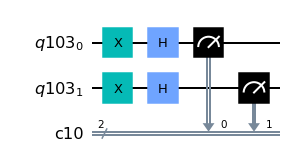

In [66]:
mixed4.draw(output='mpl')

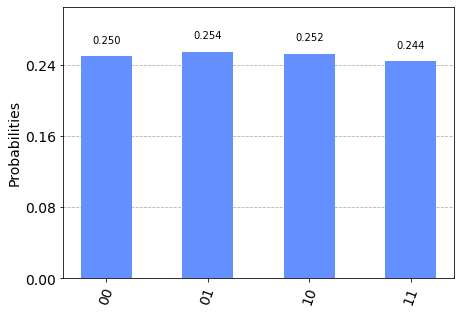

In [67]:
mixed_state = [mixed3, mixed4]
job = qiskit.execute(mixed_state, backend_sim)
result = job.result()

counts1 = result.get_counts(mixed_state[0])
counts2 = result.get_counts(mixed_state[1])

import collections
ground = collections.Counter(counts1)
excited = collections.Counter(counts2)
qiskit.tools.visualization.plot_histogram(ground + excited)

You can see here that when we measure the mixed state in the superposition basis that the results are not correlated, which is different from our previous entangled example "bell_measureXX". This shows that a mixed state is not actually entangled.

# More Information

This is just a starting point for learning about quantum computation. There are a several additional resources where to go for more information on this topic. This workshop was heavily based off of the community notebooks in the [qiskit-tutorials repository](https://github.com/Qiskit/qiskit-tutorials) these continue on and explore these topics in more detail:

1. **Amplitude and Phase**: https://github.com/Qiskit/qiskit-tutorials/blob/master/community/terra/qis_intro/amplitude_and_phase.ipynb
2. **Testing Entanglement**: https://github.com/Qiskit/qiskit-tutorials/blob/master/community/terra/qis_intro/entanglement_testing.ipynb
3. **Quantum Teleportation and Superdense Coding**: https://github.com/Qiskit/qiskit-tutorials/blob/master/community/terra/qis_intro/teleportation_superdensecoding.ipynb

The qiskit-tutorials repository also contains many other Jupyter notebooks covering a variety of topics. One thing that can be fun is applying these principles to make games: https://github.com/Qiskit/qiskit-tutorials/tree/master/community/games contains several games on Quantum computers.

If you're interested in seeing applications and algorithms that are using quantum computation take a look at the [Qiskit Aqua](https://qiskit.org/aqua) which provides a Python library for quantum alogrithms.

A paper outlining everything talked about here in more detail along with basic alogrithms building off of these concepts: https://arxiv.org/abs/1903.04359